In [41]:
import numpy as np
import sys,os
ia898path = os.path.abspath('/home/lotufo')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
from math import pi, sin, cos, atan
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

# Image read and histograming

Gray scale image and its histogram

""
""

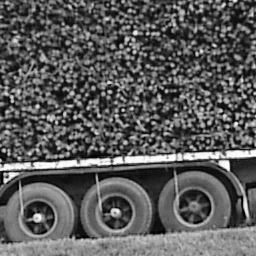

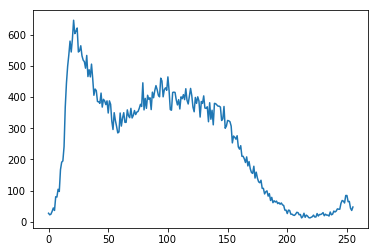

In [42]:
f=mpimg.imread('../../lotufo/ia898/data/woodlog.tif')
ia.adshow(f)
H = ia.histogram(f)
x = np.arange(len(H))
k = x[0:-1]
plt.plot(x, H)

# Normalized histogram

If the histogram is divided by the number of pixels in the image, it can be seen as a probability distribution. The sum of each values gives one. The mean gray level and the variance can be computed from the normalized histogram.
$$ h(t)=\frac{H}{n} $$
$$ \sum_{t=0}^{n-1} h(t)=1$$
$$ \mu=\sum_{t=0}^{n-1} th(t)$$
$$ \sigma^2=\sum_{t=0}^{n-1} (t-\mu)^2h(t)$$

1.0
mean is  91.0258331299
var2 is  2873.86171363


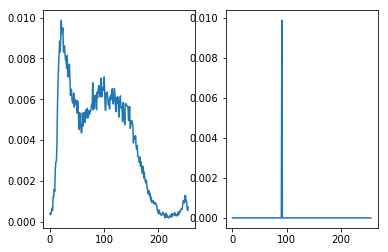

In [43]:
h = 1.*H/np.product(f.shape)
print(sum(h))
mt = sum(x * h)
st2 = sum((x-mt)**2 * h)

if abs(mt - np.mean(np.ravel(f))) > 0.01: iaerror('error in computing mean')

if abs(st2 - np.std(np.ravel(f))**2) > 0.0001: iaerror('error in computing var')

print('mean is ',mt)
print('var2 is ',st2)
 
maux = np.zeros(h.shape)
maux[int(mt)] = max(h)
plt.subplot(121)
plt.plot(x,h)
plt.subplot(122)
plt.plot(x,maux)

# Two classes

Suppose the pixels are categorized in two classes and : smaller or equal than the gray scale t and larger than t. The probability of the first class occurrence is the cummulative normalized histogram. The other class is the complementary class.
$$ \omega_0(t)=\sum_{i=0}^{t} h(i)$$
$$ \omega_1(t)=\sum_{t+1}^{n-1} h(i)$$

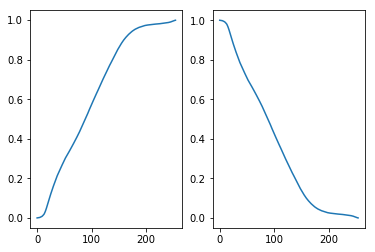

In [44]:
w0 = np.cumsum(h[0:-1])
aux = h[1::]
w1aux = np.cumsum(aux[::-1])[::-1]
w1 = 1 - w0
if max(abs(w1-w1aux)) > 0.0001: iaerror('error in computing w1')
plt.subplot(121)
plt.plot(k,w0)
plt.subplot(122)
plt.plot(k,w1)

# Mean gray level of each class

The mean gray level as a function of the thresholding t is computed and displayed below.
$$ \mu_0(t)=\frac{1}{\omega_0(t)}\sum_{i=0}^{t} ih(i)$$
$$ \mu_1(t)=\frac{1}{\omega_1(t)}\sum_{i=t+1}^{n-1} ih(i)$$

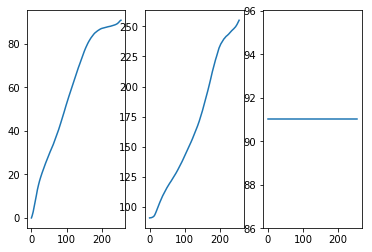

In [45]:
m0 = np.cumsum(k * h[0:-1]) / (1.*w0)
m1 = (mt - m0*w0)/w1
aux = (k+1) * h[1::]
m1x = np.cumsum(aux[::-1])[::-1] / (1.*w1)
mm = w0 * m0 + w1 * m1
if max(abs(m1-m1x)) > 0.0001: iaerror('error in computing m1')
plt.subplot(131)
plt.plot(k,m0)
plt.subplot(132)
plt.plot(k,m1)
plt.subplot(133)
plt.plot(k,mm)


# Variance of each class

The gray level variance as a function of the thresholding t is computed and displayed below.
$$ \sigma_0^2(t)=\frac{1}{\omega_0(t)}\sum_{i=0}^{t} (i-\mu_0(t))^2h(i)$$
$$ \sigma_1^2(t)=\frac{1}{\omega_1(t)}\sum_{i=t+1}^{n-1} (i-\mu_1(t))^2h(i)$$

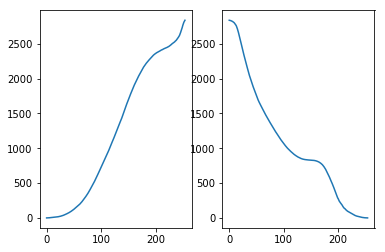

In [46]:
s02 = np.cumsum((k-m0)**2 * h[0:-1]) / (1.*w0)
aux = ((k+1)-m1)**2 * h[1::]
s12 = np.cumsum(aux[::-1])[::-1] / (1.*w1)
plt.subplot(121)
plt.plot(k,s02)
plt.subplot(122)
plt.plot(k,s12)

# Class separability

The variance between class is a good measure of class separability. As higher this variance, the better the class clustering.
$$\sigma_B^2(t)=\omega_0(t)(\mu_0(t)-\mu)^2+\omega_1(t)(\mu_1(t)-\mu)^2$$
$$\sigma_B^2(t)=\omega_0(t)\omega_1(t)(\mu_0(t)-\mu_1(t))^2$$

Optimum threshold at 93
Quality factor 0.694319838198


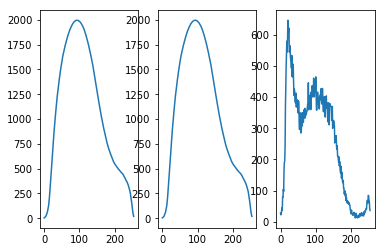

In [47]:
sB2 = w0 * ((m0 - mt)**2) + w1 * ((m1 - mt)**2)
sBaux2 = w0 * w1 * ((m0 - m1)**2)
if max(sB2-sBaux2) > 0.0001: iaerror('error in computing sB')
t = np.argmax(sB2)
eta = 1.*sBaux2[t]/st2
print('Optimum threshold at',t)
print('Quality factor', eta)
plt.subplot(131)
plt.plot(k,sB2)
plt.subplot(132)
plt.plot(k,sBaux2)
plt.subplot(133)
plt.plot(k,H[0:-1])


# Thresholding

The thresholded image is displayed to illustrate the result of the binarization using the Otsu method.

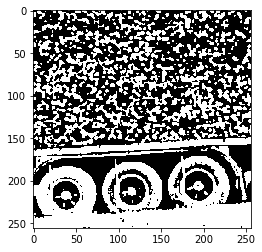

In [48]:
x = plt.imshow(f > t,cmap='gray')